# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
import nltk as nltk
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import dataframe_image as dfi

%matplotlib inline

print('NLP Homework Assignment')
print('Student Name: Charbel Nehme')

NLP Homework Assignment
Student Name: Charbel Nehme


In [2]:
# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create Alpaca Trade API client
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [3]:
# Create a newsapi client
api_key = os.getenv("NEWS_API_KEY")
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

8301

In [16]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

4481

In [5]:
# Function to create a dataframe for news articles
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError as ae:
            pass

    return pd.DataFrame(articles)

In [17]:
# Create a DataFrame with Ethereum news
ethereum_df = create_df(ethereum_news_en["articles"], "en") 
ethereum_df.head()

,title,description,text,date,language
0,Hackers swipe nearly $600 million from a 'play...,Digital thieves just pulled off another major ...,Digital thieves just pulled off another major ...,2022-03-29,en
1,"Blockchains Have a ‘Bridge’ Problem, and Hacke...",Blockchain bridges are a crucial piece of the ...,"This week, the cryptocurrency network Ronin di...",2022-04-03,en
2,Vitalik Buterin talks about the problems of cr...,The founder of Ethereum confessed his concerns...,His name is Vitalik Buterin and after dedicati...,2022-03-22,en
3,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,"If it sounds too good to be true, youre not wr...",2022-03-13,en
4,Ronin Network Ethereum theft is ‘largest-ever ...,The theft from Sky Mavis' Ronin Network of $62...,We are excited to bring Transform 2022 back in...,2022-03-29,en


In [18]:
# Save Ethereum news dataframe to CSV
file_path = (".\dataframe_csv/ethereum_news.csv")
ethereum_df.to_csv(file_path, index=False, encoding='utf-8-sig')  # Dataframe saved as CSV file for reference if needed in my analysis

In [19]:
# Save output as JPEG for use in readme file
dfi.export(ethereum_df, '.\images/01_ethereum_news_df.jpg')

In [6]:
# Create a DataFrame with Bitcoin news
bitcoin_df = create_df(bitcoin_news_en["articles"], "en")
bitcoin_df.head()

,title,description,text,date,language
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en
1,Bitcoin Reaches Milestone: 19 Millionth Bitcoi...,"Bitcoin hit a milestone Friday ""that gets the ...","Bitcoin hit a milestone Friday ""that gets the ...",2022-04-03,en
2,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en
3,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en
4,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en


In [7]:
# Save bitcoin dataframe to CSV
file_path = (".\dataframe_csv/bitcoin_news.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')  # Dataframe saved as CSV file for reference if needed in my analysis

In [8]:
# Save output as JPEG for use in readme file
dfi.export(bitcoin_df, '.\images/02_bitcoin_news_df.jpg')

In [9]:
# Create the sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

### Ethereum - Sentiment Analysis

In [20]:
# Create function for sentiment score dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# ETH - Get sentiment for the text and the title
for index, row in ethereum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

In [21]:
# Attaching sentiment columns to the Ethereum news dataframe
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df = ethereum_df.join(title_sentiment_df).join(text_sentiment_df)

In [22]:
# Describe Ethereum sentiment 
ethereum_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.048190,0.023900,0.931250,0.044900,-0.150000,0.277890,0.094000,0.888100,0.017850,0.450000
std,0.188872,0.060082,0.103155,0.088399,0.587143,0.410648,0.098136,0.109313,0.033966,0.686333
min,-0.493900,0.000000,0.722000,0.000000,-1.000000,-0.510600,0.000000,0.682000,0.000000,-1.000000
25%,-0.025675,0.000000,0.869500,0.000000,-0.250000,0.000000,0.000000,0.842000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.286350,0.080000,0.897500,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.028250,0.000000,0.534600,0.158000,1.000000,0.012000,1.000000
max,0.340000,0.194000,1.000000,0.278000,1.000000,0.867600,0.270000,1.000000,0.102000,1.000000


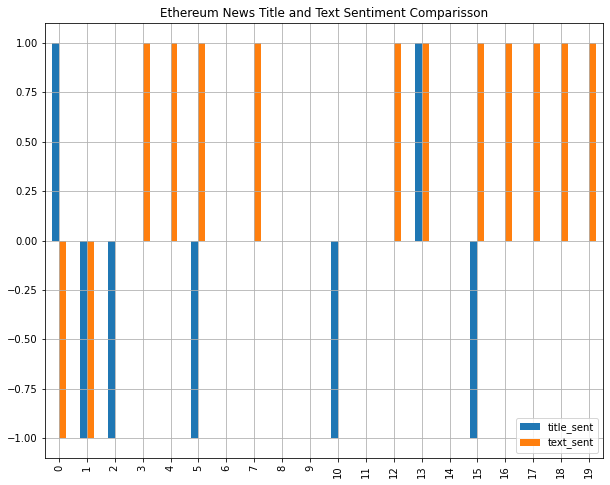

In [23]:
# Describe the Ethereum sentiment
ethereum_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="Ethereum News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

# Save plot as JPEG
plt.savefig(".\images/07_eth_sentiment.jpg")

In [ ]:
# Save ETH sentiment dataframe dataframe to CSV
file_path = (".\dataframe_csv/eth_sentiment.csv")
ethereum_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [ ]:
# Save output as JPEG for use in readme file
dfi.export(ethereum_df, '.\images/04_ethereum_sentiment_df.jpg')

### Bitcoin - Sentiment Analysis

In [10]:
# Create function for sentiment score dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# ETH - Get sentiment for the text and the title
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

In [11]:
# Attaching sentiment columns to the Bitcoin news dataframe
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_df = bitcoin_df.join(title_sentiment_df).join(text_sentiment_df)

In [12]:
# Save BTH sentiment dataframe as CSV
file_path = (".\dataframe_csv/bitcoin_sentiment.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [25]:
# Save btc sentiment df as JPEG
dfi.export(bitcoin_df, '.\images/05_bitcoin_sentiment_df.jpg')

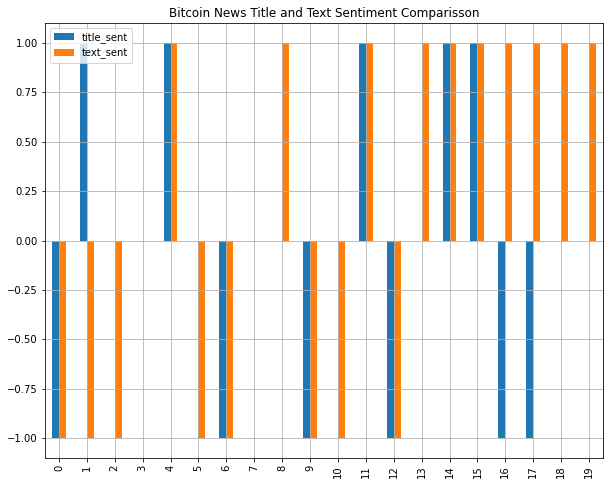

In [14]:
# Describe the Bitcoin Sentiment
bitcoin_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="Bitcoin News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

# Save plot as JPEG
plt.savefig(".\images/06_btc_sentiment.jpg")

In [15]:
# Describe bitcoin dataframe
bitcoin_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.045065,0.065950,0.837450,0.096600,-0.050000,0.051495,0.069250,0.878400,0.052400,0.100000
std,0.290566,0.110876,0.174056,0.147026,0.759155,0.423433,0.050367,0.070711,0.062097,0.967906
min,-0.599400,0.000000,0.522000,0.000000,-1.000000,-0.771300,0.000000,0.730000,0.000000,-1.000000
25%,-0.108475,0.000000,0.701500,0.000000,-1.000000,-0.250550,0.038250,0.846000,0.000000,-1.000000
50%,0.000000,0.000000,0.851500,0.000000,0.000000,0.088950,0.073000,0.871000,0.039000,0.500000
75%,0.012900,0.139250,1.000000,0.203500,0.250000,0.369700,0.102500,0.924000,0.092500,1.000000
max,0.542300,0.360000,1.000000,0.438000,1.000000,0.636900,0.171000,1.000000,0.187000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import reuters, stopwords
from string import punctuation
import re

In [27]:
# Instantiate the lemmatizer (Bitcoin)
lemmatizer = WordNetLemmatizer()
article = bitcoin_df
print(article)

                                                title  \
0   Ex-Party Producer Charged in $2.7 Million Bitc...   
1   Bitcoin Reaches Milestone: 19 Millionth Bitcoi...   
2   Everyone Has Crypto FOMO, but Does It Belong i...   
3   If you’re a Russian YouTuber, how do you get p...   
4   El Salvador turns to Binance for help on bitco...   
5                          Why Isn't Bitcoin Booming?   
6   Blockchains Have a ‘Bridge’ Problem, and Hacke...   
7       Bitcoin rises 4.4 percent to $46499 - Reuters   
8   Cryptoverse: Remember when bitcoin was 'anonym...   
9   War Is Calling Crypto’s ‘Neutrality’ Into Ques...   
10  Cryptocurrency Donations Pour Into Ukraine. Th...   
11  Is the US Developing a Digital Dollar? This We...   
12    Cryptocurrencies in a time of war - Reuters.com   
13  EU lawmakers back new tracing rule for crypto ...   
14  El Salvador postpones bitcoin bond issue, expe...   
15  Cryptoverse: Buoyant bitcoin helps market crui...   
16  Cryptoverse: Bitcoin's scar

In [28]:
# Instantiate the lemmatizer (Bitcoin)
lemmatizer = WordNetLemmatizer()
article = ethereum_df
print(article)

                                                title  \
0   Hackers swipe nearly $600 million from a 'play...   
1   Blockchains Have a ‘Bridge’ Problem, and Hacke...   
2   Vitalik Buterin talks about the problems of cr...   
3   How People Actually Make Money From Cryptocurr...   
4   Ronin Network Ethereum theft is ‘largest-ever ...   
5   'The Goal Of Crypto Is Not To Play Games With ...   
6   NFT sales hit $455 million over the past week....   
7   Biden to Feds: Figure Out This Crypto Thing, Stat   
8   I Spent 80 Minutes Inside Vitalik Buterin’s Br...   
9       Bitcoin rises 4.4 percent to $46499 - Reuters   
10  NFT sales drop again to $168 million over the ...   
11  NFT sales fell to $63 million over the past we...   
12  Stanford Cryptography Researchers Are Building...   
13  Crypto sector posts outflows for 2nd straight ...   
14  In first for Israeli banking, Leumi to enable ...   
15  Hackers Steal $600M From Play-to-Earn Game Axi...   
16  Rarible vs. Mintable: How t

In [29]:
# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = { "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", 
              "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", 
              "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", 
              "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", 
              "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", 
              "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", 
              "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", 
              "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", 
              "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", 
              "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", 
              "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", 
              "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", 
              "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", 
              "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", 
              "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", 
              "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", 
              "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", 
              "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", 
              "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", 
              "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", 
              "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", 
              "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", 
              "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", 
              "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", 
              "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", 
              "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", 
              "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", 
              "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", 
              "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", 
              "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", 
              "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", 
              "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", 
              "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", 
              "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", 
              "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", 
              "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", 
              "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", 
              "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", 
              "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", 
              "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", 
              "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", 
              "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", 
              "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", 
              "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", 
              "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", 
              "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"}
stop = set(list(sw)+list(sw_addons))

In [30]:
# Define function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [31]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    ## Define and apply the regex parameters
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]

    return tokens

In [32]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en,-0.2023,0.000,0.795,0.205,-1,-0.2280,0.072,0.831,0.097,-1,"[Mr., Spiekers, prominent, customer, whale, cl..."
1,Bitcoin Reaches Milestone: 19 Millionth Bitcoi...,"Bitcoin hit a milestone Friday ""that gets the ...","Bitcoin hit a milestone Friday ""that gets the ...",2022-04-03,en,0.0516,0.167,0.833,0.000,1,-0.4215,0.000,0.924,0.076,-1,"[Bitcoin, hit, milestone, Friday, ``, world, c..."
2,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en,0.0000,0.000,1.000,0.000,0,-0.1154,0.116,0.730,0.154,-1,"[fund, vehicle, hold, crypto, directly, grappl..."
3,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[Russia, invaded, Ukraine, Niki, Proshin, year..."
4,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en,0.4019,0.213,0.787,0.000,1,0.4939,0.123,0.877,0.000,1,"[SAN, SALVADOR, March, 23, Reuters, Salvador, ..."


In [33]:
# Save dataframe to CSV
file_path = (".\dataframe_csv/btc_with_token_column.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [34]:
# Save output as JPEG for readme file / repository
dfi.export(bitcoin_df, '.\images/08_btc_tokenized.jpg')

In [35]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Hackers swipe nearly $600 million from a 'play...,Digital thieves just pulled off another major ...,Digital thieves just pulled off another major ...,2022-03-29,en,0.3400,0.194,0.806,0.000,1,-0.5106,0.000,0.898,0.102,-1,"[Digital, thief, pulled, major, crypto, heist,..."
1,"Blockchains Have a ‘Bridge’ Problem, and Hacke...",Blockchain bridges are a crucial piece of the ...,"This week, the cryptocurrency network Ronin di...",2022-04-03,en,-0.4019,0.000,0.722,0.278,-1,-0.4215,0.051,0.851,0.098,-1,"[week, cryptocurrency, network, Ronin, disclos..."
2,Vitalik Buterin talks about the problems of cr...,The founder of Ethereum confessed his concerns...,His name is Vitalik Buterin and after dedicati...,2022-03-22,en,-0.1027,0.110,0.762,0.129,-1,0.0000,0.000,1.000,0.000,0,"[Vitalik, Buterin, dedicating, cover, edition,..."
3,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,"If it sounds too good to be true, youre not wr...",2022-03-13,en,0.0000,0.000,1.000,0.000,0,0.8340,0.236,0.713,0.050,1,"[sound, good, true, wrong, Yield, farming, ris..."
4,Ronin Network Ethereum theft is ‘largest-ever ...,The theft from Sky Mavis' Ronin Network of $62...,We are excited to bring Transform 2022 back in...,2022-03-29,en,0.0000,0.000,1.000,0.000,0,0.8555,0.251,0.749,0.000,1,"[excited, bring, Transform, 2022, in-person, J..."


In [36]:
# Save dataframe to CSV
file_path = (".\dataframe_csv/eth_with_token_column.csv")
ethereum_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [37]:
# Save output as JPEG for readme file / repository
dfi.export(ethereum_df, '.\images/09_eth_tokenized.jpg')

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [38]:
from collections import Counter
from nltk import ngrams

In [39]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 5),
 (('char', 'March'), 4),
 (('char', 'LONDON'), 4),
 (('LONDON', 'March'), 4),
 (('March', '22'), 3),
 (('22', 'Reuters'), 3),
 (('Russia', "'s"), 3),
 (("''", 'Bitcoin'), 2),
 (('Russia', 'invaded'), 2),
 (('invaded', 'Ukraine'), 2),
 (('char', 'SAN'), 2),
 (('SAN', 'SALVADOR'), 2),
 (('SALVADOR', 'March'), 2),
 (('Reuters', 'Salvador'), 2),
 (('Getty', 'Nonfungible'), 2),
 (('Nonfungible', 'Tidbits'), 2),
 (('March', '29'), 2),
 (('29', 'Reuters'), 2),
 (("'s", 'invasion'), 2),
 (('Mr.', 'Spiekers'), 1)]

In [40]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'cryptocurrency'), 3),
 (('cryptocurrency', 'boom'), 3),
 (('boom', 'year'), 3),
 (('year', 'helped'), 3),
 (('helped', 'propel'), 3),
 (('propel', 'newer'), 3),
 (('newer', 'market'), 3),
 (('market', 'record'), 3),
 (('record', 'height'), 3),
 (('height', 'digital'), 3),
 (('digital', 'collectible'), 3),
 (('collectible', 'known'), 3),
 (('known', 'NFTs'), 3),
 (('NFTs', 'fact'), 3),
 (('fact', 'total'), 3),
 (('total', 'NFT'), 3),
 (('NFT', 'sale'), 3),
 (('sale', 'volume'), 3),
 (('volume', 'hit'), 3),
 (('billion', 'past…'), 3)]

In [41]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [42]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(btc_tokens, N = 10)

[('char', 20),
 ('Bitcoin', 12),
 ('March', 11),
 ('Reuters', 11),
 ('crypto', 7),
 ('bitcoin', 6),
 ('Russia', 6),
 ('week', 6),
 ("''", 5),
 ('cryptocurrency', 5)]

In [43]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(eth_tokens, N = 10)

[('char', 20),
 ('Ethereum', 6),
 ('cryptocurrency', 6),
 ('…', 6),
 ('digital', 5),
 ('blockchain', 4),
 ('year', 4),
 ('billion', 4),
 ('Ronin', 3),
 ('fee', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

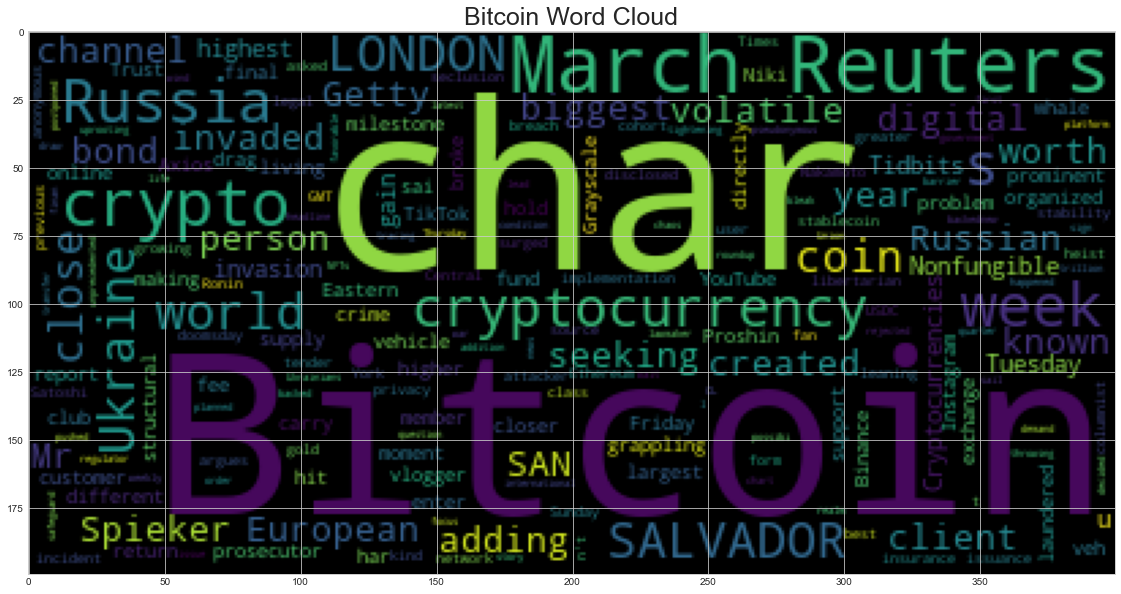

In [45]:
# Generate the Bitcoin word cloud
word_cloud = WordCloud().generate(' '.join(btc_tokens))
plt.imshow(word_cloud)
plt.title("Bitcoin Word Cloud", fontdict={'fontsize':25})

# Save output as JPEG for readme file / repository
plt.savefig(".\images/10_btc_cloud.jpg")

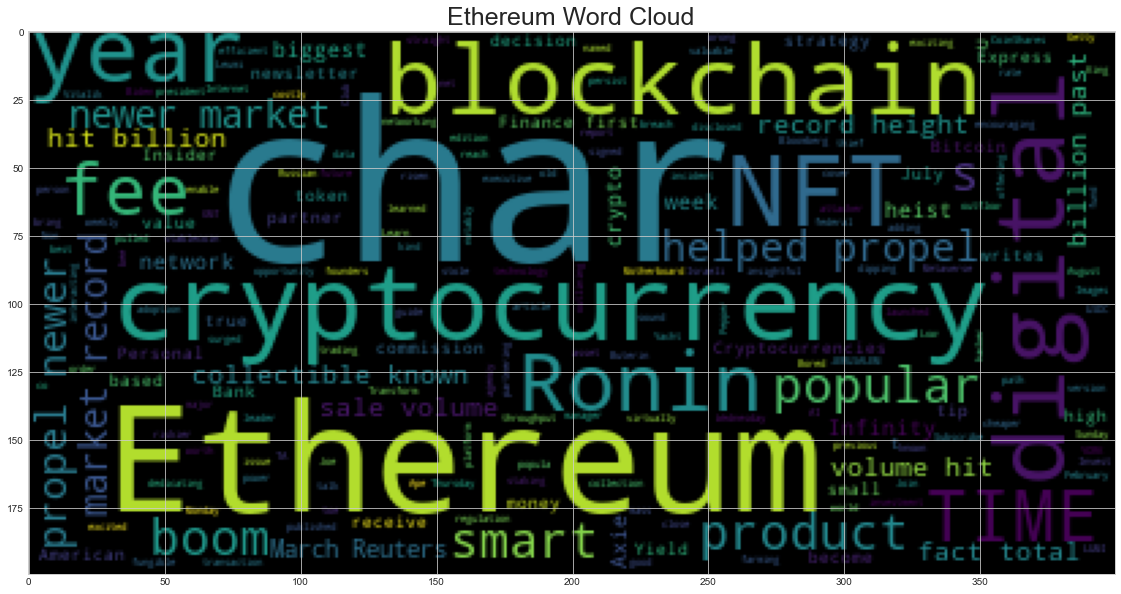

In [46]:
# Generate the Ethereum word cloud
word_cloud = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(word_cloud)
plt.title("Ethereum Word Cloud", fontdict={'fontsize':25})

# Save output as JPEG for readme file / repository
plt.savefig(".\images/11_eth_cloud.jpg")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [47]:
import spacy
from spacy import displacy

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
bitcoin_NER = bitcoin_df["text"].str.cat()

In [50]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_NER)

# Add a title to the document
doc.user_data["title"]="Bitcoin NER"

In [51]:
# Render the visualization
displacy.render(doc, style='ent')

In [52]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)

Spiekers PERSON
Eastern European NORP
Spieker PERSON
620,000 MONEY
Friday DATE
Axios PERSON
19 million CARDINAL
Grayscale Bitcoin Trust ORG
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
27 CARDINAL
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
Reuters ORG
Satoshi Nakamoto PERSON
2008 DATE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
+3275 ORG
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
March 31 DATE
Reuters ORG
European Union ORG
Thursday DATE
March 22 DATE
Reuters ORG
El Salvador GPE
last week DATE
finan GPE
Reuters ORG
first quarter DATE
$2 trillion MONEY
15 CARDINAL
Reuters ORG
U.S.

---

### Ethereum NER

In [53]:
# Concatenate all of the Ethereum text together
ethereum_NER = ethereum_df["text"].str.cat()

In [54]:
# Run the NER processor on all of the text
doc = nlp(ethereum_NER)

# Add a title to the document
doc.user_data["title"]="Ethereum NER"

In [55]:
# Render the visualization
displacy.render(doc, style='ent')

In [56]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)

Digital ORG
Motherboard PERSON
173,600 CARDINAL
Ethereum ORG
about $591.2 million MONEY
Ronin ORG
Axie Infinity GPE
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
Vitalik Buterin PERSON
TIME ORG
Bloomberg GPE
Getty Images PERSON
28-year-old DATE
Russian NORP
Transform ORG
July 19 DATE
July 20 - August 3 DATE
6 MONEY
the last year DATE
Bored Ape Yacht Club ORG
one CARDINAL
Ethereum PERSON
the past few years DATE
NFT ORG
$24 billion MONEY
Biden PERSON
Wednesday DATE
first ORDINAL
TIME ORG
weekly DATE
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
the past few years DATE
NFT ORG
$23 billion MONEY
the past few years DATE
NFT ORG
$23 billion MONEY
chars]If PERSON
Ethereum ORG
chars]NEW YORK GPE
March 21 DATE
Reuters ORG
a second straight week DATE
CoinShares ORG
Monday DATE
March 24 DATE
Reuters ORG
Leumi PERSON
first ORDINAL
Israeli NORP
Pepper Invest ORG
Thursday DATE
U.S GPE
Ronin LOC
February 2021 DATE
Ethereum ORG
Axie Infinity GPE